In [1]:
from build.hamiltonian import PyHermiteBC
import numpy as np
import scipy as sp
import scipy.integrate
import matplotlib.pyplot as plt

In [14]:
grid = np.linspace(-1, 1, 100)
grid = grid**3
splines = PyHermiteBC(grid, 0, 0)
t = np.arange(-1, 1, 0.001)

%timeit sx_dense =  np.array([[sp.integrate.quad(lambda x: splines.fBSplineBC(x, i) * splines.fBSplineBC(x, j), grid[0], grid[-1])[0] for i in range(splines.getSpaceDim())] for j in range(splines.getSpaceDim())])
%timeit sx = splines.getSNMatr()
print(sp.sparse.csr_matrix((3, 4)))

basis = np.array([[splines.fBSplineBC(ti, i) for i in range(splines.getSpaceDim())] for ti in t])
f = lambda x: splines.d1BSplineBC(x, 5)

res, error = sp.integrate.quad(f, a=-1, b=1)
#res

1.33 s ± 60.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
723 µs ± 59.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



7.746387858713248e-11

In [2]:
from scipy import sparse
import numpy as np
A = sparse.csc_matrix(np.array([[0, 2], [5, 0]]))
B = sparse.csc_matrix(np.array([[1, 2], [3, 4]]))
sparse.kron(A, B).toarray()

array([[ 0,  0,  2,  4],
       [ 0,  0,  6,  8],
       [ 5, 10,  0,  0],
       [15, 20,  0,  0]])

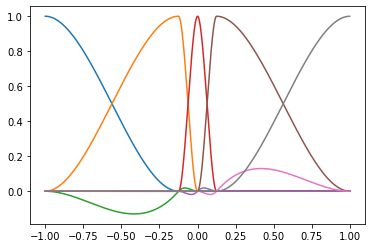

In [83]:
plt.plot(t, basis)
plt.show()